**Problem Statement:** Data includes airline reviews from 2006 to 2019 for popular airlines around the world with
multiple choice and free text questions. Data is scraped in Spring 2019. The main objective
is to predict whether passengers will refer the airline to their friends.

**Feature descriptions briefly as follows:**
* airline: Name of the airline.
* overall: Overall point is given to the trip between 1 to 10.
* author: Author of the trip
* reviewdate: Date of the Review customer review: Review of the customers in free text format
* aircraft: Type of the aircraft
* travellertype: Type of traveler (e.g. business, leisure)
* cabin: Cabin at the flight date flown: Flight date
* seatcomfort: Rated between 1-5
* cabin service: Rated between 1-5
* foodbev: Rated between 1-5 entertainment: Rated between 1-5
* groundservice: Rated between 1-5
* valueformoney: Rated between 1-5
* recommended: Binary, target variable.

In [1]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [156]:
# Loading Dataset
pd.set_option('display.float_format',  '{:,.2f}'.format)
data_path = '/content/drive/MyDrive/ML Projects/airlinereviews.xlsx'
air_df = pd.read_excel(data_path)

In [157]:
# Rows and Feature Count
print(f'The total number of rows are {air_df.shape[0]}.')
print(f'The total number of columns are {air_df.shape[1]}.')

The total number of rows are 131895.
The total number of columns are 17.


In [158]:
# Column Names 
print(air_df.columns)

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')


In [159]:
# Inforamtion about dataset
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

Total 17 features given(including Target). 7 Float and 10 Object.

In [160]:
# Lets see first few rows
air_df.shape

(131895, 17)

In [161]:
# Lets see last few rows
air_df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [162]:
# Unique count 
air_df.nunique()

airline               81
overall               10
author             44069
review_date         3015
customer_review    61172
aircraft            2088
traveller_type         4
cabin                  4
route              24549
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64

In [163]:
# Descriptionof Numericl Features
air_df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,"64,017.00","60,681.00","60,715.00","52,608.00","44,193.00","39,358.00","63,975.00"
mean,5.15,2.95,3.19,2.91,2.86,2.69,2.94
std,3.48,1.44,1.57,1.48,1.51,1.61,1.59
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,1.00,1.00,2.00,1.00,1.00,1.00,1.00
50%,5.00,3.00,3.00,3.00,3.00,3.00,3.00
75%,9.00,4.00,5.00,4.00,4.00,4.00,4.00
max,10.00,5.00,5.00,5.00,5.00,5.00,5.00


In [164]:
# Null values count
air_df.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

**Data Processing**

In [165]:
# Dropping rows which has NaN value in all each cell
air_df.dropna(how = 'all',inplace = True)

In [166]:
# Renaming column names according the data description
air_df.rename(columns={'overall':'score', 'customer_review':'text_of_reveiw'}, inplace=True)

In [167]:
# Missing value count by column wise
air_df.isnull().sum()

airline                0
score               1930
author                 0
review_date            0
text_of_reveiw         0
aircraft           46229
traveller_type     26192
cabin               2644
route              26221
date_flown         26314
seat_comfort        5266
cabin_service       5232
food_bev           13339
entertainment      21754
ground_service     26589
value_for_money     1972
recommended         1507
dtype: int64

In [169]:
# Checking missing values in each column %
missing_val_count_by_column = air_df.isnull().sum()/len(air_df)
print((missing_val_count_by_column).sort_values(ascending=False))

aircraft          0.70
ground_service    0.40
date_flown        0.40
route             0.40
traveller_type    0.40
entertainment     0.33
food_bev          0.20
seat_comfort      0.08
cabin_service     0.08
cabin             0.04
value_for_money   0.03
score             0.03
recommended       0.02
text_of_reveiw    0.00
review_date       0.00
author            0.00
airline           0.00
dtype: float64


In [141]:
# Dropping Aircraft and Author columns
air_df.drop(columns = ['aircraft','author', 'date_flown'], inplace = True)

In [142]:
# Checking Duplicated Records. Keeping last record.
air_df.duplicated(keep='last').sum()

4764

In [112]:
# Droppinng duplicated records keeping last
air_df = air_df.drop_duplicates(keep='last')

In [143]:
# Shape of dataframe after removing duplicated values
air_df.shape

(65947, 14)

In [144]:
# Null values count
air_df.isnull().sum()

airline                0
score               1930
review_date            0
text_of_reveiw         0
traveller_type     26192
cabin               2644
route              26221
seat_comfort        5266
cabin_service       5232
food_bev           13339
entertainment      21754
ground_service     26589
value_for_money     1972
recommended         1507
dtype: int64

In [145]:
# Creating copy for data processing, feature engineering, EDA and model building
airdf = air_df.copy()

In [146]:
airdf.head(3)

,airline,score,review_date,text_of_reveiw,traveller_type,cabin,route,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.00,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,London to Izmir via Istanbul,4.00,5.00,4.00,4.00,2.00,4.00,yes
3,Turkish Airlines,2.00,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,Istanbul to Bucharest,4.00,1.00,1.00,1.00,1.00,1.00,no
5,Turkish Airlines,3.00,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,Rome to Prishtina via Istanbul,1.00,4.00,1.00,3.00,1.00,2.00,no


In [173]:
# Two dates feature and check thier datatype and convert accordingly
airdf[['review_date']].dtypes

review_date    datetime64[ns]
dtype: object

In [152]:
# Date format changed
airdf['review_date']=pd.to_datetime(airdf['review_date'])

In [153]:
# Dates Format
airdf['review_date'].head(5)

1   2019-05-08
3   2019-05-07
5   2019-05-07
7   2019-05-06
9   2019-05-06
Name: review_date, dtype: datetime64[ns]

**EDA and Filling Missing Values**

**Target Variable**

In [176]:
airdf['recommended'].value_counts()

no     33894
yes    30546
Name: recommended, dtype: int64

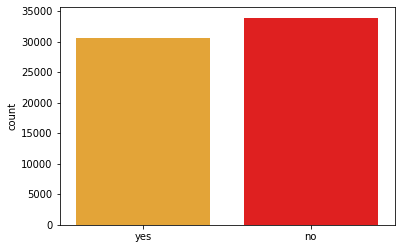

In [184]:
sns.countplot(x = airdf['recommended'].values, palette=['#FFAC1C','#FF0000'])
plt.show()